In [1]:
import numpy as np
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import matplotlib.pyplot as plt
from skimage import io, morphology
from skimage.feature import peak_local_max
from skimage.morphology import erosion, dilation

# Question 1

(824, 1000)


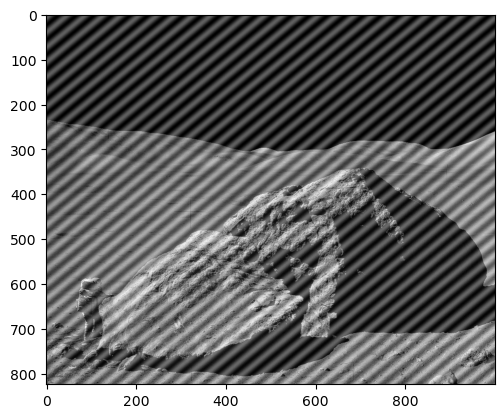

In [2]:
# get and display the HW2_DegradedImage.jpeg
img1 = io.imread('./HW2_DegradedImage.jpeg', as_gray=True)
plt.imshow(img1, cmap='gray')
print(img1.shape)
plt.show()       

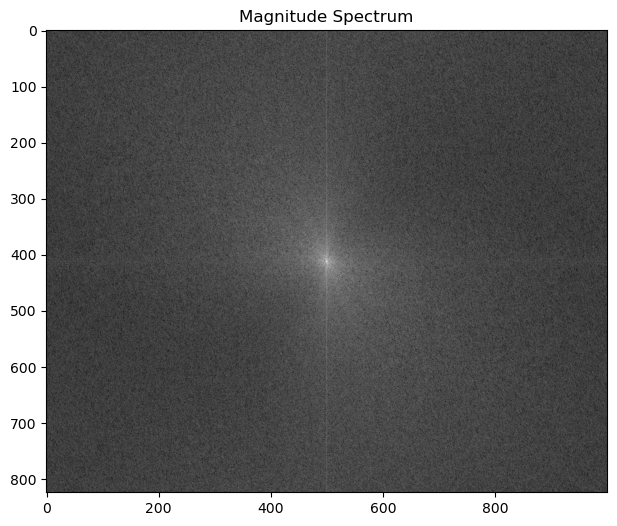

In [13]:
# compute the Fourier Transform and shift it
img1_fft = np.fft.fft2(img1)
img1_ffts = np.fft.fftshift(img1_fft)

plt.figure(figsize = (10,6))
plt.imshow(np.log(1 + np.abs(img1_ffts)), cmap = 'gray')
plt.title('Magnitude Spectrum')
# plt.axis('off')
plt.show()

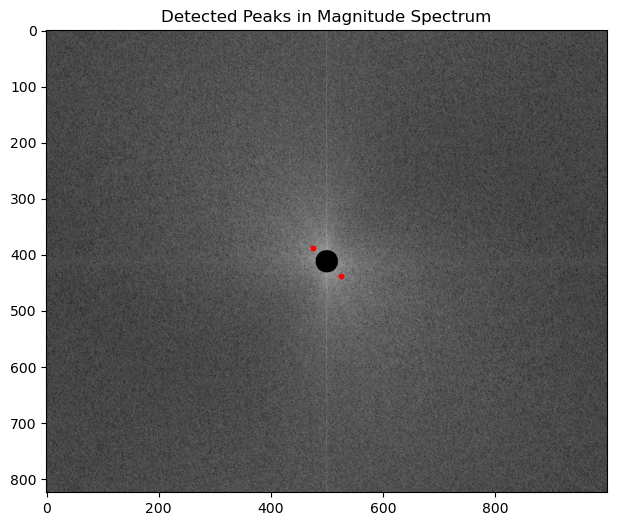

In [4]:
# compute the magnitude spectrum
magnitude_spectrum = np.log(1 + np.abs(img1_ffts))

# this is to mask the center of the magnitude spectrum
radius = 20  # Radius of the circle to mask
N, M = magnitude_spectrum.shape
center_x, center_y = N // 2, M // 2
x, y = np.ogrid[:N, :M]
center_mask = (x - center_x) ** 2 + (y - center_y) ** 2 <= radius ** 2

magnitude_spectrum[center_mask] = 0

# detect local maxima (noise frequencies)
coordinates = peak_local_max(magnitude_spectrum, min_distance=20, threshold_abs=10 )

# visualize the detected peaks on the Fourier Transform
plt.figure(figsize=(10, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.scatter(coordinates[:, 1], coordinates[:, 0], color='red', s=10)# Plot detected peaks
# print(coordinates)
plt.title('Detected Peaks in Magnitude Spectrum')
plt.show()


(824, 1000)


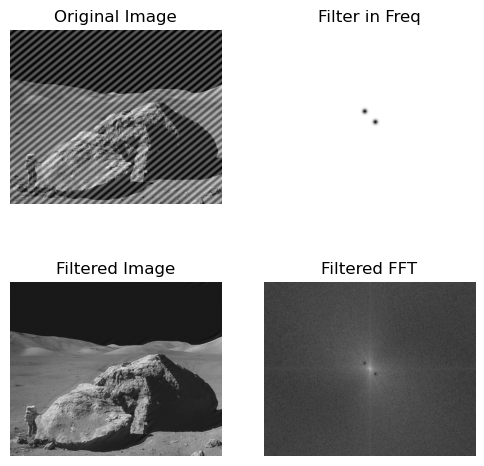

In [5]:
# notch filter generation (need to understand)

N, M = img1_ffts.shape
x, y = np.meshgrid(np.arange(M), np.arange(N))


a1 = 0.008
a2 = 0.008

Z = np.ones_like(img1_ffts)

for x0, y0 in coordinates:
    Z *= 1 - np.exp(-a1*(x-y0)**2 - a2*(y-x0)**2)

print(Z.shape)

IMFs = img1_ffts*Z

IMFr = np.fft.ifftshift(IMFs)
imfr = np.fft.ifft2(IMFr)

plt.figure(figsize = (6,6))

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(img1, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Filter in Freq')
plt.imshow(np.log(1+np.absolute(Z)), cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Filtered Image')
plt.imshow(np.real(imfr), cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Filtered FFT')
plt.imshow(np.log(1+np.absolute(IMFs)), cmap = 'gray')
plt.axis('off')

plt.show()

(-0.5, 999.5, 823.5, -0.5)

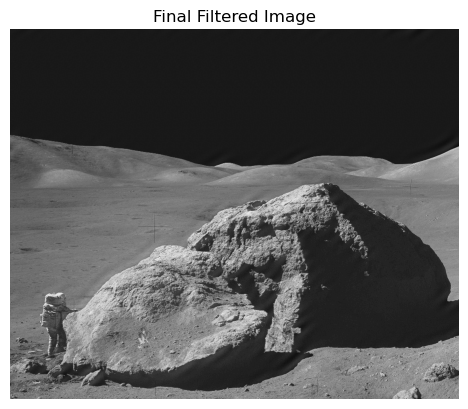

In [6]:
# Show the final image
plt.title('Final Filtered Image')
plt.imshow(np.real(imfr), cmap = 'gray')
plt.axis('off')

# Question 2

(512, 512)


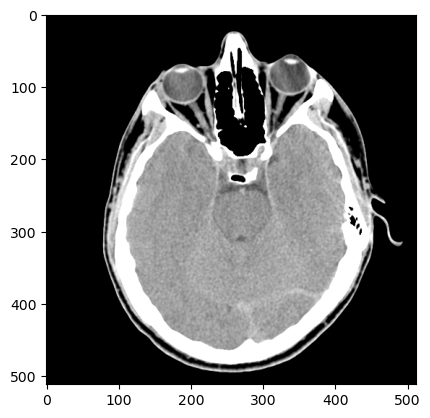

In [7]:
img2 = io.imread('./HW2_Head.tif', as_gray=True)
print(img2.shape)
plt.imshow(img2, cmap='gray')
plt.show() 

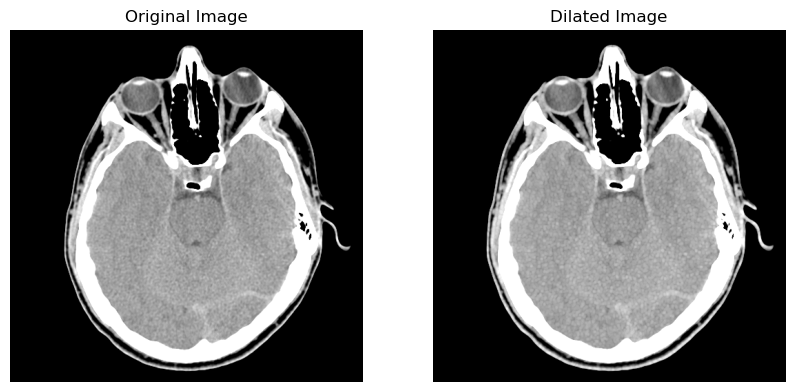

In [8]:
# Defining the square-shaped sampling element
selem = morphology.square(2)

dilated_img2 = dilation(img2, footprint=selem)

# Display the original and dialated image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_img2, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.show()

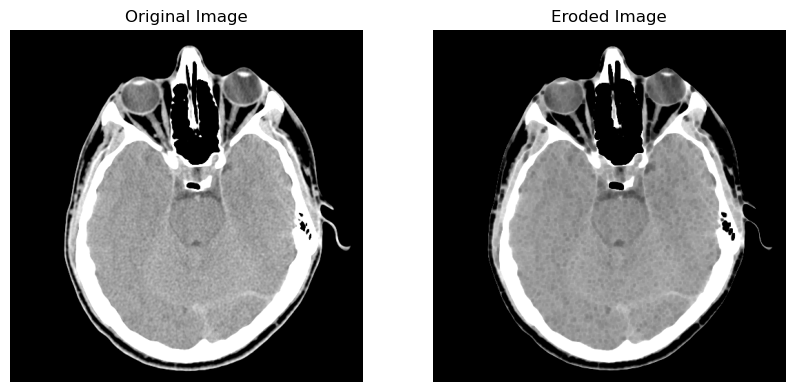

In [9]:
selem = morphology.square(3)
eroded_img2 = erosion(img2, footprint=selem)

# Display the original and eroded image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_img2, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.show()

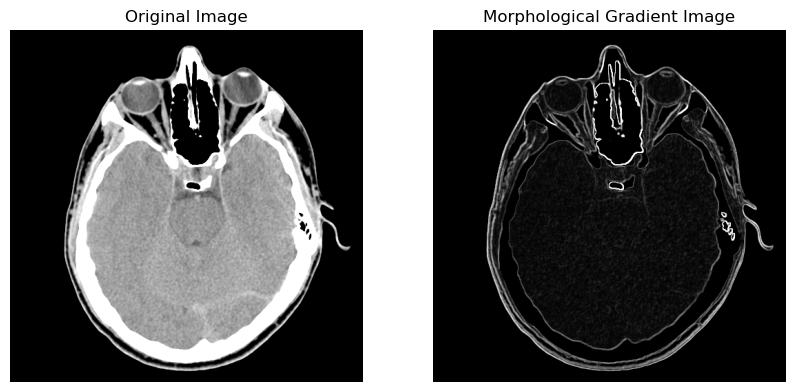

In [10]:
morphological_gradient = dilated_img2 - eroded_img2

dilated_img2 = dilation(img2, footprint=selem)

# Display the original and morphological gradient
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(morphological_gradient, cmap='gray')
plt.title('Morphological Gradient Image')
plt.axis('off')

plt.show()

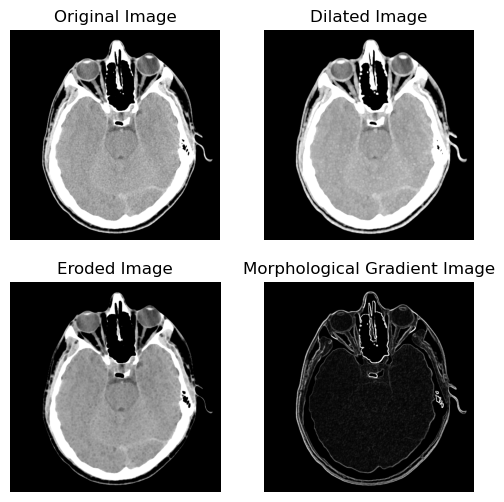

In [12]:
plt.figure(figsize = (6,6))

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(img2, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Dilated Image')
plt.imshow(dilated_img2, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Eroded Image')
plt.imshow(eroded_img2, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Morphological Gradient Image')
plt.imshow(morphological_gradient, cmap = 'gray')
plt.axis('off')

plt.show()